In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('LR.csv')

In [5]:
df.head()

,CGPA,Package
0,2.75,7.57
1,3.90,11.93
2,3.46,10.67
3,3.20,8.89
4,2.31,8.80


In [6]:
print(df.to_string())

     CGPA  Package
0    2.75     7.57
1    3.90    11.93
2    3.46    10.67
3    3.20     8.89
4    2.31     8.80
5    2.31     7.40
6    2.12     5.17
7    3.73    11.85
8    3.20     8.63
9    3.42    11.05
10   2.04     7.28
11   3.94    11.00
12   3.66    11.94
13   2.42     7.67
14   2.36     7.90
15   2.37     9.01
16   2.61     7.58
17   3.05     8.40
18   2.86     7.69
19   2.58     6.92
20   3.22     9.58
21   2.28     7.18
22   2.58     8.02
23   2.73     9.02
24   2.91     8.74
25   3.57    12.16
26   2.40     6.94
27   3.03    11.81
28   3.18    10.17
29   2.09     5.41
30   3.22     8.59
31   2.34     7.50
32   2.13     6.17
33   3.90    12.41
34   3.93    12.26
35   3.62    10.79
36   2.61     6.98
37   2.20     5.09
38   3.37     9.66
39   2.88     9.50
40   2.24     6.93
41   2.99     7.72
42   2.07     6.38
43   3.82    11.85
44   2.52     6.68
45   3.33    10.14
46   2.62     7.92
47   3.04     7.98
48   3.09     9.63
49   2.37     7.67
50   3.94    12.90
51   3.55   

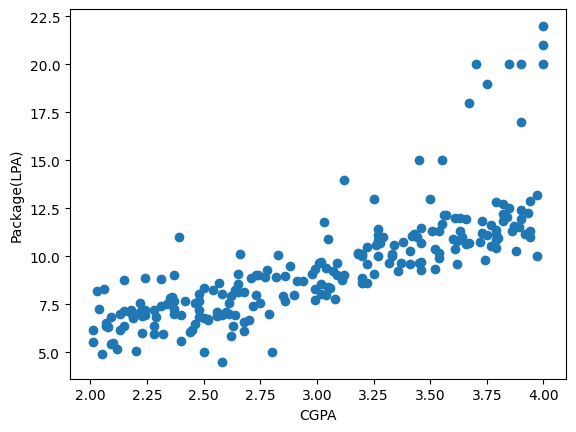

In [7]:
plt.scatter(df['CGPA'],df['Package'])
plt.xlabel('CGPA')
plt.ylabel('Package(LPA)')
plt.show()

In [8]:
x = df.iloc[:,0:1] #The result is a DataFrame with just the first column
y = df.iloc[:,-1] #selects the last column. The result is a Series

In [9]:
y

0       7.57
1      11.93
2      10.67
3       8.89
4       8.80
       ...  
216     7.00
217    22.00
218    15.00
219    20.00
220    14.00
Name: Package, Length: 221, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
# Split the data (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [11]:
print("Train X:\n", x_train)
print("Test X:\n", x_test)

Train X:
      CGPA
135  2.65
2    3.46
172  3.02
3    3.20
128  2.01
..    ...
43   3.82
22   2.58
72   2.01
15   2.37
168  2.08

[176 rows x 1 columns]
Test X:
      CGPA
142  2.99
166  2.64
157  3.52
35   3.62
20   3.22
218  3.45
65   3.09
191  3.79
140  3.92
23   2.73
99   2.22
147  3.01
10   2.04
54   3.20
118  3.79
13   2.42
126  3.64
24   2.91
119  3.08
41   2.99
186  3.63
30   3.22
127  3.72
90   2.24
188  3.06
108  2.46
64   2.56
207  3.20
197  3.79
25   3.57
74   3.41
146  3.22
53   3.79
158  2.48
149  2.56
98   2.05
85   2.65
6    2.12
28   3.18
12   3.66
29   2.09
66   2.28
18   2.86
44   2.52
5    2.31


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) #for train 

LinearRegression()

In [29]:
cgpa_value = 4.0
predicted_package = lr.predict([[cgpa_value]])

print(f"Predicted package for CGPA {cgpa_value} is {predicted_package[0]:.2f} LPA")

Predicted package for CGPA 4.0 is 13.53 LPA


/Users/akhi/Desktop/Akhi/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
y_test

142     9.33
166     8.24
157    10.36
35     10.79
20      9.58
218    15.00
65      9.03
191    10.86
140    11.17
23      9.02
99      7.58
147     9.66
10      7.28
54     10.12
118    12.81
13      7.67
126    10.99
24      8.74
119     7.80
41      7.72
186    11.30
30      8.59
127    10.77
90      7.22
188     8.36
108     6.45
64      6.91
207    10.00
197    11.16
25     12.16
74     10.29
146    10.47
53     10.43
158     7.22
149     7.12
98      4.89
85      8.14
6       5.17
28     10.17
12     11.94
29      5.41
66      6.35
18      7.69
44      6.68
5       7.40
Name: Package, dtype: float64

In [21]:
y_pred = lr.predict(x_test)

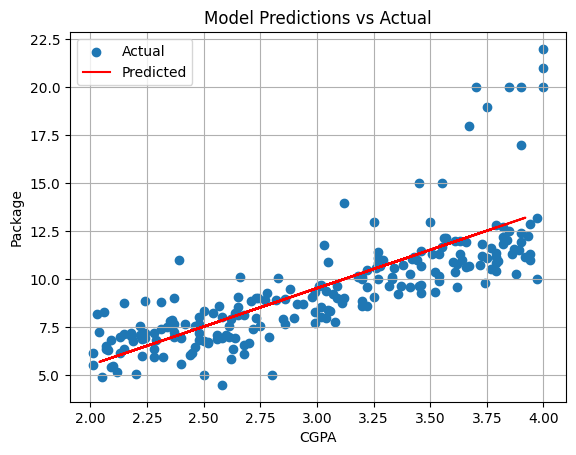

In [22]:

plt.scatter(df['CGPA'],df['Package'], label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Model Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
m = lr.coef_ ##for slope(m)
print(m)

[3.99579026]


In [24]:
b = lr.intercept_ ##for bias(b)
print(b)

-2.4528041637559657


In [25]:
# y = mx + b

In [30]:
m * 4 + b


array([13.53035687])